# Importing all the neccessary libraries 

In [1]:
from bs4 import BeautifulSoup as soup
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from urllib.request import urlopen as uReq
my_url = "https://www.lottonumbers.com/south-africa-powerball-results-2021"

# opening up connection, grabbing the page

In [2]:
uClient = uReq(my_url)
page_html = uClient.read()
uClient.close()

In [3]:
#html parsing
page_soup = soup(page_html, "html.parser")

In [4]:
#open file name
filename = "PowerBallv2.csv"
f = open(filename, "w")

headers = "div1, div2, div3, div4, div5, pb\n"

f.write(headers)

33

## gradding numbers and saving as a dictionary 

In [5]:
#grad division numbers
div = dict()
for i in range(78):
    nb2 = page_soup.findAll('ul', {'class': 'balls -cn'})[i].text.strip().replace('\n', ',')
    if nb2 not in div:
        div[nb2] = 1
    else:
        div[nb2] += 1
print(div)

{'15,19,21,24,41,2': 1, '15,30,44,45,48,15': 1, '23,30,32,36,39,12': 1, '4,14,18,24,38,9': 1, '2,13,20,42,47,3': 1, '24,25,38,40,49,2': 1, '13,15,20,28,29,15': 1, '14,17,24,31,43,15': 1, '18,26,41,44,47,4': 1, '8,10,17,26,39,14': 1, '16,18,23,31,35,10': 1, '8,12,17,28,43,13': 1, '2,11,13,19,40,2': 1, '2,9,18,42,43,8': 1, '9,10,35,42,48,20': 1, '6,10,11,45,47,13': 1, '21,23,34,35,41,9': 1, '6,21,33,37,50,18': 1, '10,18,23,30,48,1': 1, '5,23,41,42,50,2': 1, '1,4,12,13,33,6': 1, '7,13,18,20,25,6': 1, '8,16,18,30,34,4': 1, '4,12,27,35,50,1': 1, '5,12,15,28,29,14': 1, '21,45,47,48,49,18': 1, '7,32,33,40,42,6': 1, '20,22,25,41,45,5': 1, '2,28,29,38,42,2': 1, '3,12,29,31,38,15': 1, '1,16,18,26,39,8': 1, '20,30,34,38,43,7': 1, '6,35,41,43,45,4': 1, '4,16,34,36,46,6': 1, '3,11,24,33,41,16': 1, '3,8,19,28,49,11': 1, '13,23,24,27,44,10': 1, '9,12,27,37,48,7': 1, '1,3,17,28,50,7': 1, '17,34,37,39,44,10': 1, '3,5,23,37,42,11': 1, '31,33,36,38,44,4': 1, '3,4,8,25,44,15': 1, '19,21,24,45,50,5': 1, '4

In [6]:
df= pd.DataFrame(div.keys(), columns=['Numbers'])
df

,Numbers
0,"15,19,21,24,41,2"
1,"15,30,44,45,48,15"
2,"23,30,32,36,39,12"
3,"4,14,18,24,38,9"
4,"2,13,20,42,47,3"
...,...
73,"8,16,19,20,50,18"
74,"6,13,22,34,49,10"
75,"2,11,16,22,47,19"
76,"4,8,12,15,19,17"


## seperate  one column into 6 using the "," delimeter

In [7]:
df[['div1','div2', 'div3', 'div4', 'div5', 'pb']] = df.Numbers.str.split(",",expand=True)
df

,Numbers,div1,div2,div3,div4,div5,pb
0,"15,19,21,24,41,2",15,19,21,24,41,2
1,"15,30,44,45,48,15",15,30,44,45,48,15
2,"23,30,32,36,39,12",23,30,32,36,39,12
3,"4,14,18,24,38,9",4,14,18,24,38,9
4,"2,13,20,42,47,3",2,13,20,42,47,3
...,...,...,...,...,...,...,...
73,"8,16,19,20,50,18",8,16,19,20,50,18
74,"6,13,22,34,49,10",6,13,22,34,49,10
75,"2,11,16,22,47,19",2,11,16,22,47,19
76,"4,8,12,15,19,17",4,8,12,15,19,17


## Drop/delete the 'Numbers' column

In [8]:
del df['Numbers']
df

,div1,div2,div3,div4,div5,pb
0,15,19,21,24,41,2
1,15,30,44,45,48,15
2,23,30,32,36,39,12
3,4,14,18,24,38,9
4,2,13,20,42,47,3
...,...,...,...,...,...,...
73,8,16,19,20,50,18
74,6,13,22,34,49,10
75,2,11,16,22,47,19
76,4,8,12,15,19,17


In [9]:
df.describe()

,div1,div2,div3,div4,div5,pb
count,78,78,78,78,78,78
unique,24,30,33,29,22,20
top,3,16,17,42,49,15
freq,11,7,5,6,8,7


## Top 5 frequest numbers for each div

In [10]:
n = 5
df.value_counts()[:n].index.tolist()

[('1', '11', '21', '32', '42', '11'),
 ('4', '7', '15', '30', '32', '10'),
 ('5', '18', '31', '36', '45', '8'),
 ('5', '16', '27', '32', '46', '18'),
 ('5', '14', '19', '30', '35', '12')]

In [11]:
#can also use mode, however still learning why its different from the top one 
df.mode()

,div1,div2,div3,div4,div5,pb
0,3,16,17,25,49,15
1,NaN,NaN,18,42,NaN,NaN
2,NaN,NaN,24,NaN,NaN,NaN


In [12]:
df.value_counts()[:5].sort_values(ascending=False)

div1  div2  div3  div4  div5  pb
1     11    21    32    42    11    1
4     7     15    30    32    10    1
5     18    31    36    45    8     1
      16    27    32    46    18    1
      14    19    30    35    12    1
dtype: int64

In [13]:
df['div1'].value_counts()[df['div1'].value_counts() == df['div1'].value_counts().max()]


3    11
Name: div1, dtype: int64

In [14]:
df['div2'].value_counts()[df['div2'].value_counts() == df['div2'].value_counts().max()]


16    7
Name: div2, dtype: int64

In [15]:
df['div3'].value_counts()[df['div3'].value_counts() == df['div3'].value_counts().max()]


17    5
18    5
24    5
Name: div3, dtype: int64

In [16]:
df['div5'].value_counts()[df['div5'].value_counts() == df['div5'].value_counts().max()]


49    8
Name: div5, dtype: int64

In [17]:
df['pb'].value_counts()[df['pb'].value_counts() == df['pb'].value_counts().max()]

15    7
Name: pb, dtype: int64

In [18]:
df.shape

(78, 6)

In [19]:
# Save dataframe as a csv file to my local computer 
df.to_csv('PowerBall2021.csv')

## Analysis: Diagrams 

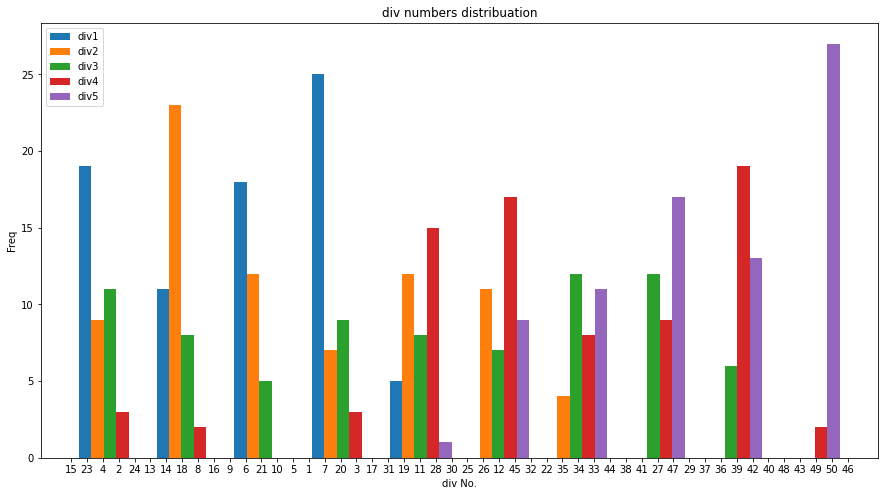

<Figure size 9600x7200 with 0 Axes>

In [26]:
plt.hist(df[['div1', 'div2', 'div3', 'div4', 'div5']])
plt.legend(['div1', 'div2', 'div3', 'div4', 'div5'])
plt.title('div numbers distribuation')
plt.ylabel('Freq')
plt.xlabel('div No.')
plt.figure(figsize=(20, 15), dpi=480)
plt.show()

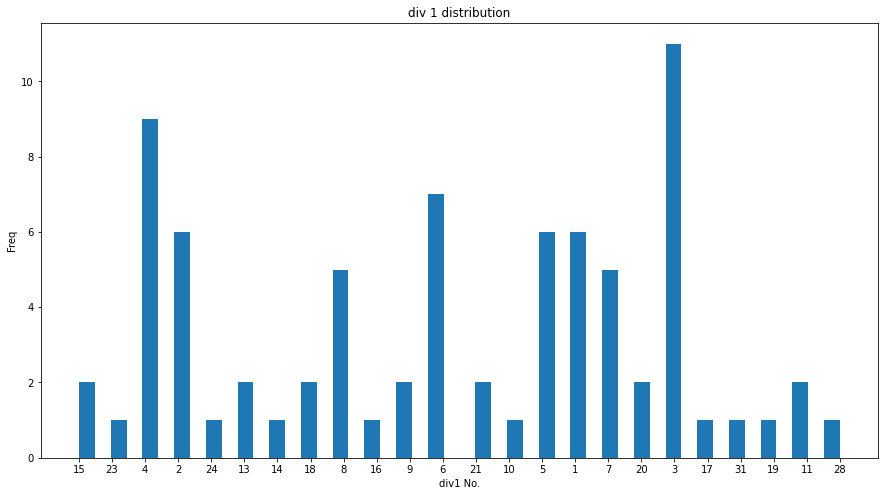

In [21]:
plt.rcParams["figure.figsize"] = (15,8)
plt.hist(df['div1'], bins=48)
plt.title('div 1 distribution')
plt.ylabel('Freq')
plt.xlabel('div1 No.')
plt.show()

## Frequent numbers 

In [27]:
#plt.rcParams["figure.figsize"] = (15,8)
plt.figure(figsize=(20, 15), dpi=560)
plt.hist(df[['div1','div2', 'div3', 'div4','div5']], bins=100, stacked=True)
plt.legend(['div1', 'div2', 'div3', 'div4', 'div5'])
plt.title('div No. distribution')
plt.ylabel('Freq')
plt.xlabel('div No.')
plt.show()

In [23]:
# Playing around the matplotlib library and function and doing the same thing but different ways 
plt.figure(figsize=(20, 15), dpi=560)
plt.hist([df['div1'],df['div2'], df['div3'], df['div4'], df['div5']],
          bins=120, stacked=True, color = ['r','g','y','k', 'b'])
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.title('div no. distribution')
plt.ylabel('Freq')
plt.xlabel('div No.')
plt.show()

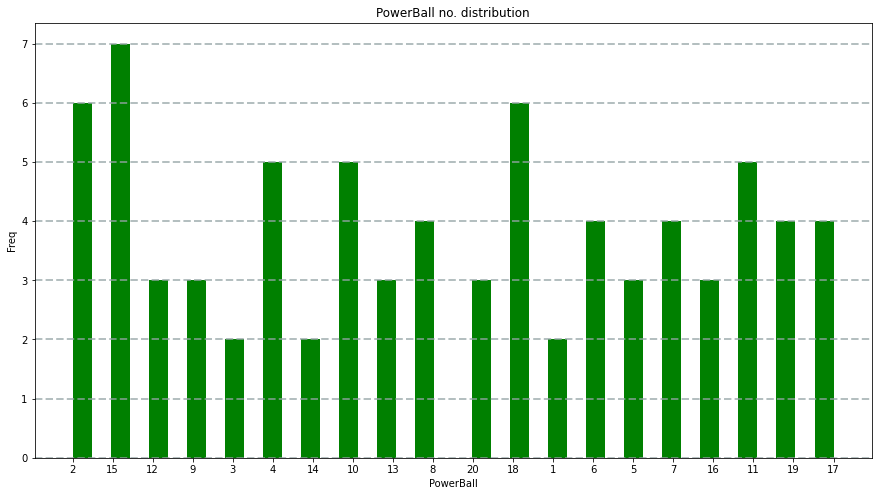

In [24]:
plt.hist(df['pb'],bins=40,color = 'g')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.title('PowerBall no. distribution')
plt.ylabel('Freq')
plt.xlabel('PowerBall')
plt.show()

# Predicting some random Powerball numbers
# Not based of the previous results

In [25]:
import random

pwNumbers = []

for i in range (0,6):
  number = random.randint(1,50)
  #Check if this number has already been picked and ...
  while number in pwNumbers:
    # ... if it has, pick a new number instead 
    number = random.randint(1,50)
  
  #appending all the random picked numbers to to our list.
  pwNumbers.append(number)

#Sort the list in ascending order
pwNumbers.sort()

## Random PowerBall Number (1 to 20)
pb = random.randint(1,20)

print('divNumbers: ',pwNumbers)
print('PowerBall: ', pb)

divNumbers:  [9, 12, 16, 29, 31, 37]
PowerBall:  8
